# Introduction

The evolution of the magnetic field is governed by the induction equation. In the MHD approximation, it can be written as

\begin{equation}
\frac{\partial \bf B}{\partial t} = \nabla \times \left( \bf v \times B \right)\,,
\end{equation}

where ${\bf v}$ is the velocity of the fluid and ${\bf B}$ is the magnetic field. The velocity evolution is coupled that of the magnetic field via the Lorentz force ($\propto \nabla\times {{\bf B} \times {\bf B}}$). For simplicity, assume that ${\bf B}$ does not affect ${\bf v}$, so we can prescribe ${\bf v}$ externally. This is usually called the "kinematic" regime, where the momentum equation is solved decoupled from the induction equation (or just provides an external velocity field). Note that even in this regime, ${\bf v}$ is, in general, a function of time and the three spatial coordinates.

Induction equation is not a conservative equation. To illustrate this, let us expand the R.H.S. of the induction equation:

\begin{equation}
\nabla \times \left( \bf v \times B \right) = {\bf v} \left( \nabla \cdot {\bf B} \right) - {\bf B} \left( \nabla \cdot {\bf v} \right) + \left({\bf B} \cdot \nabla\right) {\bf v} -   \left({\bf v} \cdot \nabla\right) {\bf B}   \,.\
\end{equation}

Since $\nabla \cdot B = 0$, the first term vanishes. Thus, the induction equation reads

\begin{equation}
\frac{D{\bf B}}{Dt} = \frac{\partial \bf B}{\partial t} + \left({\bf v} \cdot \nabla\right) {\bf B} = \left({\bf B} \cdot \nabla\right) {\bf v} - {\bf B} \left( \nabla \cdot {\bf v} \right)\,, 
\end{equation}

where $D/Dt = \partial_t + {\bf v}\cdot \nabla$ is the material derivative. 

As written above, the induction equation implies that the magnetic field is not conserved along fluid lines. It is not conserved because of source terms related to compression ($\nabla . {\bf v}\neq 0$) and velocity gradients along the magnetic field ($\left({\bf B}\cdot \nabla\right) {\bf v}$). This last term, when coupled to the Lorentz force leads to Alfvén waves.

Also, an update of the magnetic field must satisfy the solenoidal condition. This condition is clearly met analytically, but developing a numerical solver that does conserve $\nabla\cdot B$ imposes additional complications. 

The form of the induction equation combined with (i) the solenoidal constraint and (ii) a new family of waves that appear when coupling it with the momentum equation, makes it a challenging problem. 
However, some insight can be obtained by studying particular configurations where the induction gets simple.


-------
# Advection of magnetic fields

# Case 1 - ${\bf B} = B {\bf e}_z$ and ${\bf v} = v_x {\bf e}_x + v_y {\bf e}_y$ in a 2D sheet ($\partial_z = 0$)

- Assumptions: Let us consider a velocity field orthogonal to the magnetic field. Without loss of generality, we rotate the frame of reference such that ${\bf B} = B_z(x,y) {\bf e}_z$ and ${\bf v} = v_x(x,y) {\bf e}_x + v_y(x,y) {\bf e}_y$.


- Induction equation: Under the assumptions above, the term ${\bf v\cdot \nabla {\bf B}}$ vanishes, and the induction equation becomes

\begin{equation}
\frac{\partial B_z}{\partial t} + {\bf v} \cdot \nabla{B_z} = - {B_z} \nabla \cdot {\bf v}\,,
\end{equation}

which can be written in conservative form:

\begin{equation}
\frac{\partial B_z}{\partial t} + \nabla \cdot \left( B_z {\bf v}\right) = 0\,.
\end{equation}

So, the magnetic field is passively advected by the velocity field. It behaves as the density in the continuity equation, so it can be solved using the solvers you already know.


- Solenoidal constraint: For any given time, the magnetic field is of the form:

\begin{equation}
{\bf B}(x,y,t) = B_z(x,y,t) {\bf e}_z, 
\end{equation}

so, its divergence is:

\begin{equation}
\nabla \cdot {\bf B} = \partial_z \left( {B_z}(x,y,t)\right) = 0\,,
\end{equation}

which is a property independent of the method used to update the field.

### Task:

#### Implement an advection scheme (1D or 2D) and advect a magnetic field perpendicular to a given velocity field.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def adams_bashforth(f0,f1,dfdt,dt):
    return f1+dt*(1.5*dfdt(f1)-0.5*dfdt(f0))

def coordinates(n):
    ds=2.0*np.pi/n
    x=ds*np.arange(n)
    return ds,x

def IC(x,v,t):
    f=np.sin(x-v*t)
    return f

def Courant(C,v,ds):
    dt=C/np.max(v/ds)
    return dt

def deriv(f,ds,axis=0,order=2):
    return (np.roll(f,-1,axis)-np.roll(f,+1,axis))/(2.0*ds)

def square_wave(x,v,dx,t):
    f=IC(x,v,t)
    return np.tanh((x/dx)*f)

def left_slope(f):
    return f-np.roll(f,1)

def MonCen(ls):
    rs=np.roll(ls,-1)
    prod=rs*ls
    cs = np.zeros(ls.shape)
    w = np.where(prod>0)
    cs[w]=2*prod[w]/(rs[w]+ls[w])
    return cs

Slope=MonCen
def dfdt(f, V):
    ls = left_slope(f)
    cs = Slope(ls)
    flux = V*(f + (dx-V*dt)*vx/dx*0.5)
    return (np.roll(flux,1)-flux)/dx

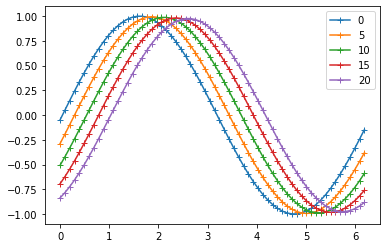

In [2]:
n=64
C=0.5
vx, vy=1,1
dx,x=coordinates(n)
dt=Courant(C,vx,dx)
f=IC(x,vx,0)

Slope=MonCen
for i in range(21):
    f=f+dt*dfdt(f, vx)
    if i%5==0:
        plt.plot(x,f,'-+',label=i)
plt.legend();

------------
# Case 2 - ${\bf B} = B_x {\bf e}_x + B_y {\bf e}_y$ and ${\bf v} = v_x {\bf e}_x + v_y {\bf e}_y$ in a 2D sheet ($\partial_z = 0)$

- Asumptions: Consider a 2D velocity and magnetic fields such that ${\bf B} = B_x(x,y) {\bf e}_x + B_y(x,y) {\bf e}_y$ and ${\bf v} = v_x(x,y) {\bf e}_x + v_y(x,y) {\bf e}_y$. Assume the problem to be 2D, so $\partial_z = 0$. 


- Induction equation: Under the assumptions above, the induction equation reads better in terms of the vector potential ${\bf A}$ (such that ${\bf B} = \nabla \times {\bf A}$), which, because of the form of ${\bf B}$, only has component along the $z$ direction (i.e., ${\bf A} = A {\bf e}_z$). In this case, the induction equation reads

    \begin{align}
        \partial_t \left(\nabla \times {\bf A}\right) + \nabla \times \left[\left(\nabla \times {\bf A}\right) \times {\bf v}\right] &= 0 \nonumber \\
    \nabla \times \left[ \partial_t {\bf A} + \left(\nabla \times {\bf A}\right) \times {\bf v} \right] &= 0 \nonumber \\
    \nabla \times \left[ \left(\partial_t A + {\bf v}\cdot \nabla A\right) {\bf e}_z \right] &= 0 \nonumber 
    \end{align}

    The term in brackets is clearly the gradient of some scalar potential, i.e.:

    \begin{equation}
    \partial_t A + {\bf v}\cdot \nabla A = \partial_z \phi 
    \end{equation}
    However, since the problem is 2D, the R.H.S. is zero, implying

    \begin{equation}
    \frac{D A}{Dt} = \frac{\partial A}{\partial t} + {\bf v}\cdot \nabla A = 0\,.
    \end{equation}
    Thus, the vector potential is strictly conserved along the streamlines of the fluid.

    Once we solve the equation for the potential, the magnetic field is:

\begin{equation}
{\bf B} = \frac{\partial A}{\partial y} {\bf e}_x - \frac{\partial A}{\partial x} {\bf e}_y\,.
\end{equation}

- Solenoidal constraint: Since we solve for the scalar potential, the solenoidal property of the magnetic field is automatically satisfied.



### Simple discretization of the transport equation and numerical solution

The equation we want to solve is:

\begin{equation}
\partial_t A + {\bf v} \cdot \nabla A = 0\,.
\end{equation}

This equation is equivalent to:
\begin{equation}
\frac{DA}{Dt} = 0\,,
\end{equation}
i.e., A is conserved quantity along the flow lines.


The simplest thing is to use operator splitting + finite differences, and write:

\begin{align}
A^{n+1} - A^{n} = \frac{v_i \Delta t}{\Delta x} \left(A_{i+1/2}^{n+1/2} - A_{i-1/2}^{n+1/2} \right) = 0\,.
\end{align}

So, the crucial step is to determine good representations of $A_{i\pm1/2}^{n+1/2}$. For simplicity, we provide a very simple first-order upwind (diffusive) method, however, higher order methods can be implemented.

--------
### Task 1: Create a 2D mesh that will constitute the domain of the problem

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Some customization
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['image.origin'] = 'lower'

In [4]:
class Mesh():
    """
    Class to store the domain of the problem
    """
    def __init__(self,xmin,xmax,ymin,ymax,nx,ny):
        
        # Parameters
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.nx   = nx
        self.ny   = ny
        self.extent = [xmin,xmax,ymin,ymax] #Useful for imshow

        # The mesh is created here....
        x    = np.linspace(xmin, xmax, nx)
        y    = np.linspace(ymin, ymax, ny)
        self.dx   = abs(x[1]-x[0])
        self.dy   = abs(y[1]-y[0])
            
        #This is the 2D mesh
        self.x,self.y = np.meshgrid(x,y)

mesh = Mesh(-0.5,0.5,-0.5,0.5,200,200) #This is how we use the mesh class

-----------------
### Task 2: Initialize the external velocity field ${\bf v}$ on the mesh and plot it

The test problem suggested is to initialize a rotating region and magnetic lines parallel to the y-axis. This test is similar to the well-known (full MHD) rotor test.

The test consists in definining a rotating region centered at $x_0=y_0=0$, described by:

\begin{align}
v_x &= \left\{
\begin{array}{cl}
  -v_\theta\sin{\theta} & r \leq r_1 \\
  -f(r)v_\theta\sin{\theta} & r_1 < r < r_2 \\
  0 & r \geq r_2\\
\end{array}\right. \nonumber \\
v_y &= \left\{
\begin{array}{cl}
  v_\theta\cos{\theta} & r \leq r_1 \\
  f(r)v_\theta\cos{\theta} & r_1 < r < r_2 \\
  0 & r \geq r_2\\
\end{array}\right. \nonumber
\end{align}

with $r=\sqrt{x^2+y^2}$, $\tan{\theta} = y/x$, $v_{\theta} = \Omega_0 r$, and the smoothing function $f(r)=(r_2-r)/(r_2-r_1)$. $\Omega_0$ is the angular frequency of the rotating region.

#### Suggested parameters for the mesh:

$x_{\rm min} = -0.5$, $x_{\rm max} =  0.5$, 

$y_{\rm min} = -0.5$, $y_{\rm max} =  0.5$ 

$\Omega_0 = 1.0$ 

$r_1 = 0.3$, $r_2 = 1.1 r_1$

In [5]:
def velocity_field(mesh, r1, omega0):
    
    """
    Returns the velocity field
    """
    
    r2      = 1.1*r1 # Smoothing (10%)
    x, y = mesh.x, mesh.y
    # Definitions
    r     = np.sqrt(x**2+y**2)
    theta = np.arctan2(y,x)
    vphi  = omega0*r
    f     = (r2-r)/(r2-r1)

    # Velocity arrays
    vx   = np.zeros(mesh.x.shape)
    vy   = np.zeros(mesh.x.shape)
#     vx=vx.flatten()
#     vy=vy.flatten()
    # Initialize the velocity field
    
    #Turned the problem on its head
    vx =np.where(r>r2,vx,-f*vphi*np.sin(theta))
    vy = np.where(r>r2,vy,f*vphi*np.cos(theta))
    vx = np.where(r>r1,vx,-vphi*np.sin(theta))
    vy = np.where(r>r1,vy,vphi*np.cos(theta))
    
    return vx, vy

# Parameters
omega_0 = 10.0   # Angular frequency of the spinning region
r1      = 0.3    # Radius of the spinning region

mesh = Mesh(-0.5,0.5,-0.5,0.5,200,200)
vx, vy = velocity_field(mesh,0.3,10.0)

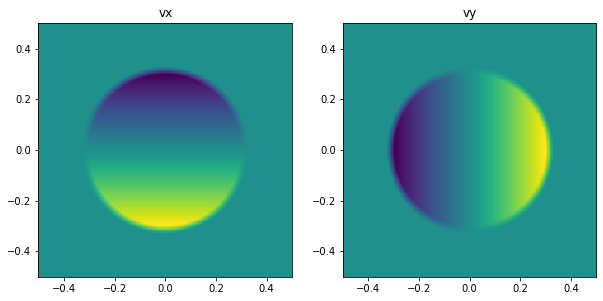

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(vx, extent=mesh.extent)
plt.title("vx")

plt.subplot(1,2,2)
plt.imshow(vy, extent=mesh.extent)
plt.title("vy")
plt.show()

---------
### Task 3: 

#### 3a) Plot streamlines of the velocity field on top of each component of the velocity field (Tip: use streamplot() from matplotlib). 

#### 3b) Does the plot make sense? Explain what you observe.

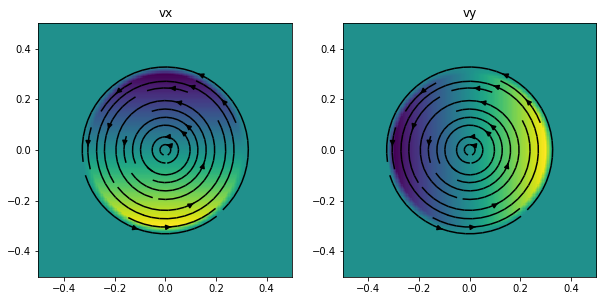

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("vx")
plt.imshow(vx, extent=mesh.extent)
plt.streamplot(mesh.x, mesh.y, vx, vy, color='k')

plt.subplot(1,2,2)
plt.title("vy")
plt.imshow(vy, extent=mesh.extent)
plt.streamplot(mesh.x, mesh.y, vx, vy, color='k')

plt.show()

### Task 4: Initial magnetic field

#### 4a) Initialize a constant magnetic field parallel to the y-axis (i.e., $B_x = 0$) using the vector potential.

Help: Since, in the simple problem under consideration ${\bf B} = \partial_y A {\bf e}_x - \partial_x A {\bf e}_y$, if $B_x$ = 0, the potential vector does not depend on $y$. Furthermore, since $B_y$ is constant, the vector potential satisfies:

\begin{equation}
\partial_x A = c
\end{equation}

which implies that the potential vector is of the form:

\begin{equation}
 A(x) = cx + A_0
\end{equation}

#### Take c=1, A_0=0, and initialize the vector potential

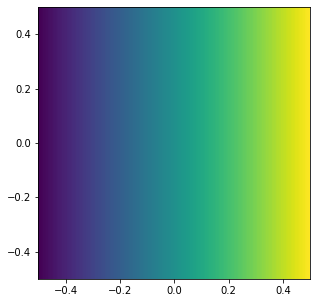

In [8]:
A0 = mesh.x
plt.imshow(A0,extent=mesh.extent)

### Task 5: Magnetic lines

Magnetic lines can be plotted with the same function used to plot the streamlines of the velocity field (streamplot()), however, it requires obtaining ${\bf B}$ from $A_z$, which involves derivatives. In the simple problem under consideration, however, it is actually very simple to plot the magentic lines.

By definition, magentic lines are tangent to the magnetic vector (similarly, streamlines are tangent to the velocity vector field).

Let's do the following calculation:

\begin{equation}
{\bf B} \cdot \nabla A_z = \left(\partial_y A_z {\bf e}_x - \partial_x A_z {\bf e}_y \right) \cdot \left( \partial_x A_z {\bf e}_x + \partial_y A_z {\bf e}_y\right) = \partial_y A_z \partial_x A_z -\partial_x A_z \partial_y A_z = 0
\end{equation}

It shows shows that ${\bf B}$ is perpendicular to $\nabla A_z$. Isocontours of $A_z$ are perpendincular to $\nabla A_z$, so they must be parallel to ${\bf B}$. We then conclude that isocontours of $A_z$ are magentic lines.

#### 5a) Plot magnetic lines of the initial condition using streamplot().

#### 5b) Plot magnetic lines of the initial condition as isocontours of $A_z$.

#### 5c) Why does streamplot swap the sign of one magnetic line at the begining of the plot? Tip: Is the initial condition periodic in the X direction?

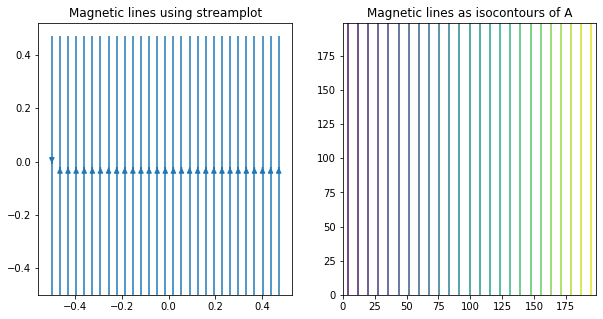

In [9]:
plt.figure(figsize=(10,5))

#We calculate the magnetic field from A (bx = d_y A, by = -d_x A)
bx = A0-np.roll(A0, 1, axis=0)
by = A0-np.roll(A0, 1, axis=1)

plt.subplot(1,2,1)
plt.title("Magnetic lines using streamplot")
plt.streamplot(mesh.x, mesh.y, bx, by)

plt.subplot(1,2,2)
plt.title("Magnetic lines as isocontours of A")
plt.contour(A0, levels=30)

plt.show()

### Task 6: Evolve the induction equation to find $A(t)$

In [10]:
class Transport():
    """
    This is the class we use to transport the vector potential
    """
    def advect(self,dt,axis):
        """
        1st order scheme "Donor cell"
        """
    
        if axis == 0:
            v = self.vy
            delta = self.mesh.dy

        if axis == 1:
            v = self.vx
            delta = self.mesh.dx
    
        pv = np.where(v>0)
        nv = np.where(v<=0)

        Am = np.roll(self.A, +1, axis=axis)
        Ap = np.roll(self.A, -1, axis=axis)

        self.A[pv] -= dt/delta*v[pv]*(self.A[pv]-Am[pv])
        self.A[nv] -= dt/delta*v[nv]*(Ap[nv]-self.A[nv])
    
    def __init__(self,mesh,vx,vy,A):

        #CFL condition
        self.dt = 0.5*np.sqrt(mesh.dx**2+mesh.dy**2)/np.max(np.sqrt(vx**2+vy**2))
        
        self.mesh = mesh
        self.vx = vx
        self.vy = vy
        self.A  = np.copy(A)
        
    def update(self,total_time):

        time = 0
        while(time < total_time):
        
            # We check we are beyond the requested output_time
            if time+self.dt > total_time:
                effective_dt = total_time-time
            else:
                effective_dt = self.dt
        
            # Simple operator split (first transport along X, then along Y)
            self.advect(effective_dt,axis=1)
            self.advect(effective_dt,axis=0)
            
            time += effective_dt

#### Example of use

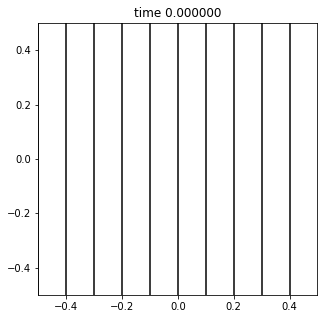

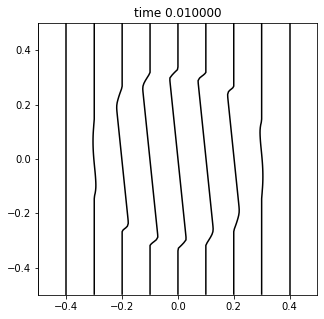

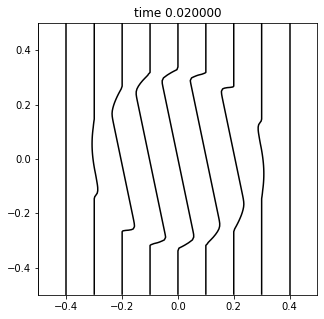

In [11]:
mesh  = Mesh(-0.5,0.5,-0.5,0.5,100,100)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh,vx,vy,A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',linestyles='solid')
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 0.01   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 2      # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',linestyles='solid')
    plt.title("time {:f}".format(time))
    plt.show()

### Reconnection due to finite numerical resistivity

#### 6a) Use $\Omega_0 = 10$, $nx=ny=100$ and evolve $A$ by steps $\Delta t = 0.1$ until reaching a final time $t = 0.5$. For each step, plot the magnetic line associated with the isocontours $A = 0$. 


    - What happens with the magnetic line? Is this what you expected from theoretical arguments?
    - Increase the number of grid-points to 400x400, what changes? Is this expected? Explain

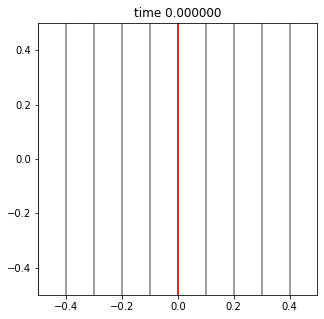

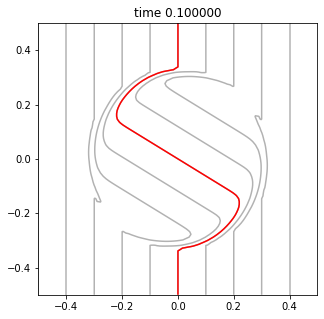

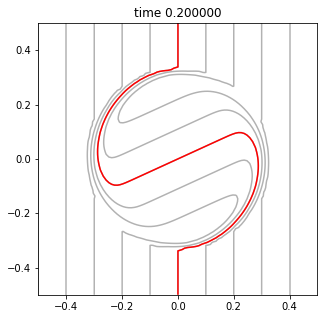

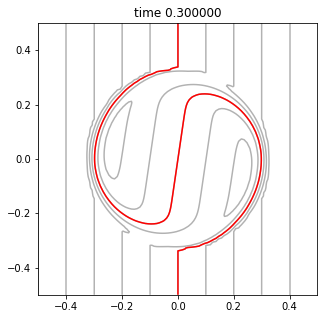

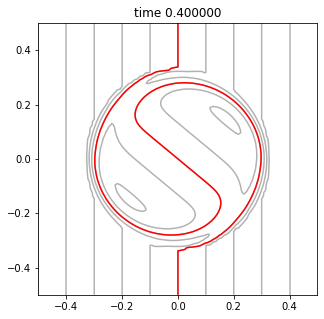

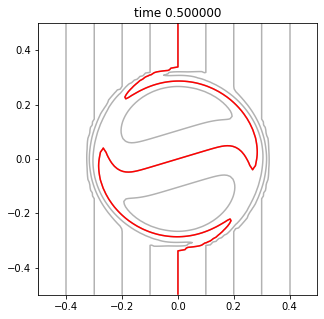

In [12]:
##Red line is the A=0 line

mesh  = Mesh(-0.5,0.5,-0.5,0.5,100,100)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh,vx,vy,A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',alpha=0.5, linestyles='solid')
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,[0],colors='r',linestyles='solid')
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 0.1   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 5     # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',alpha=0.3, linestyles='solid')
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,[0],colors='r',linestyles='solid')
    plt.title("time {:f}".format(time))
    plt.show()

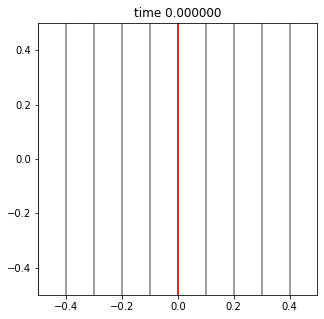

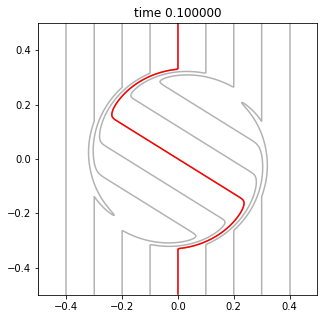

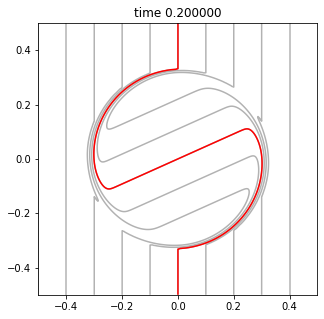

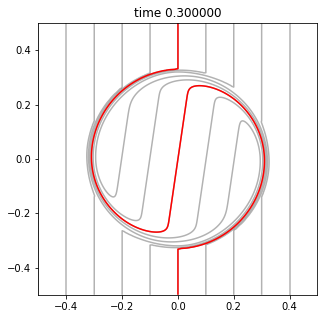

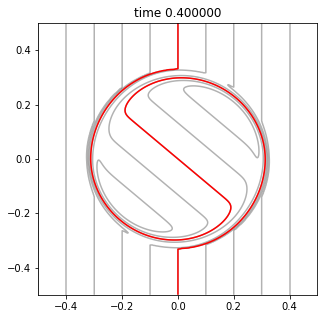

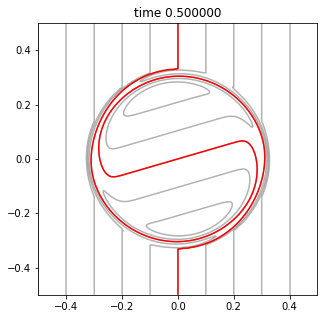

In [13]:
##Red line is the A=0 line

mesh  = Mesh(-0.5,0.5,-0.5,0.5,400,400)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh,vx,vy,A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',alpha=0.5, linestyles='solid')
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,[0],colors='r',linestyles='solid')
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 0.1   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 5     # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',alpha=0.3, linestyles='solid')
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,[0],colors='r',linestyles='solid')
    plt.title("time {:f}".format(time))
    plt.show()

### Field expulsion due to numerical resitivity

We will study the steady-state solution of the system.

#### 6b) Use $n_x=n_y=200$ to evolve $A$ for a time $t=20$ by steps $\Delta t = 5$.  For each $\Delta t$, plot 20 magnetic lines in the range A=(-0.5,0.5).
    
Note that in steady-state, our problem reads:
\begin{equation}
{\bf v}\cdot \nabla A_z = 0
\end{equation}
However, magnetic lines are isocontours of A:
\begin{equation}
{\bf B}\cdot \nabla A_z = 0
\end{equation}
so, in steady-state, ${\bf B}$ and ${\bf v}$ are parallel. Does the steady-state numerical solution show that?

#### 6c) For t=20, plot the streamlines on top of the magnetic lines. What happened with the magnetic field in the rotating region? Explain.

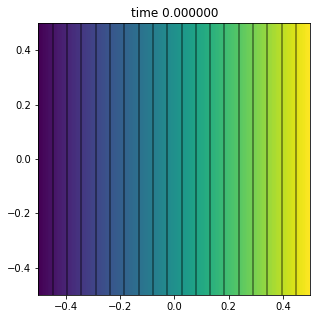

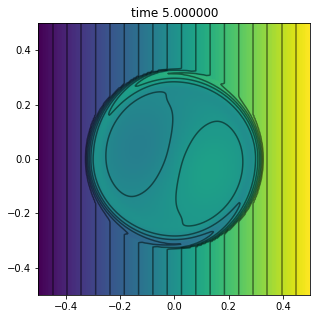

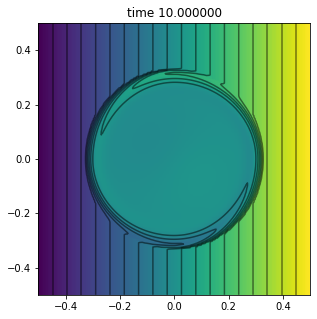

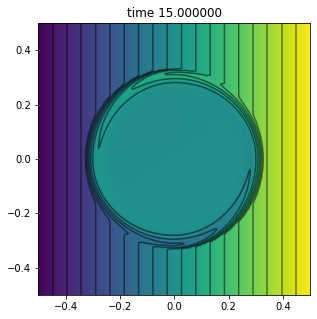

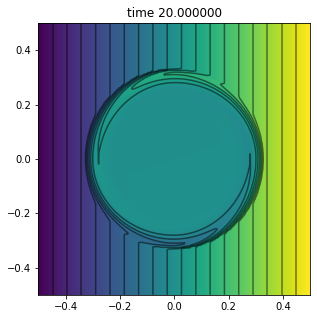

In [14]:
##Red line is the A=0 line

mesh  = Mesh(-0.5,0.5,-0.5,0.5,200,200)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh,vx,vy,A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,np.linspace(-0.5,0.5, 20),colors='k',alpha=0.5, linestyles='solid')
plt.imshow(transport.A, extent=transport.mesh.extent)
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 5   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 4   # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,np.linspace(-0.5,0.5, 20),colors='k',alpha=0.5, linestyles='solid')
#     plt.contour(transport.mesh.x,transport.mesh.y,transport.A,[0],colors='r',linestyles='solid')
    plt.imshow(transport.A, extent=transport.mesh.extent)
    plt.title("time {:f}".format(time))
    plt.show()

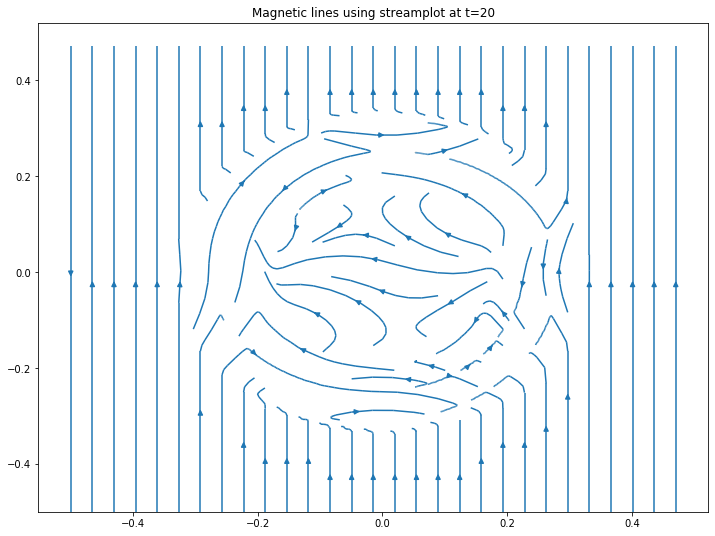

In [15]:
bx20, by20 = transport.A-np.roll(transport.A, 1, axis=0), transport.A-np.roll(transport.A, 1, axis=1)
fig, ax=plt.subplots(figsize=(12,9))
ax.set_title("Magnetic lines using streamplot at t=20")
ax.streamplot(mesh.x, mesh.y, bx20, by20, minlength=0.1, maxlength=2)

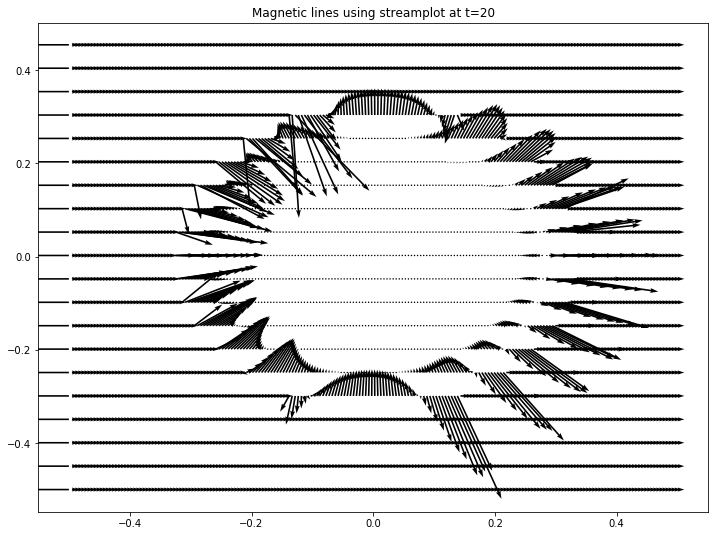

In [16]:
bx20, by20 = transport.A-np.roll(transport.A, 1, axis=0), transport.A-np.roll(transport.A, 1, axis=1)
fig, ax=plt.subplots(figsize=(12,9))
ax.set_title("Magnetic lines using quiverplot at t=20")
ax.quiver(mesh.x[::10], mesh.y[::10], by20[::10], bx20[::10], scale=0.5)

## Answers

Case 1:

Task 1:
This is understood as simply advecting a quantity that behaves like $\rho$ from week 1, so I have taken f as a function designating whichever (rho/B) and taken my initial condition as a sine wave and advected that in one dimension. Since B is perpendicular to the velocity, there is no change in B other than pure advection

Case 2:

1: The mesh is created with  x    = np.linspace(xmin, xmax, nx), y    = np.linspace(ymin, ymax, ny), self.dx   = abs(x[1]-x[0]), self.dy   = abs(y[1]-y[0])

2: See above figures, used np.where to dictate 2d mask

3: 

a) See above

b) The direction is very nice and always circular and there is no problems with where the streamlines are, but streamlines at the same radius should have the same velocity and thus the same streamline length, but they don’t. Supposedly one would have to use plt.quiver for that (see below)

4:

a) Since c=1, A0=0, the equation for A(x) is simply x, see above for plot

5: 

a) B_x = a0 – np.roll(A0, 1, axis=0), B_y= a0 – np.roll(A0, 1, axis=1), a scalar could be multiplied on both to get the right value but it hardly matters here

b) See above

c) Since there periodic boundary conditions, we should actually have minus the first line, so what we see completely makes sense

6

a) Red line is the A=0 line. So from purely theoretical considerations there should be no dissipation of B, but we know that we have introduced some numerical resistivity because our grid isn’t infinitely fine. When 
increasing the mesh to 400x400, we see less dissipation, as expected.

b) Yes, B and v are parallel on the edge of the circle, inside the circle the equations are fulfilled not because v and B are parallel, but because B=0

c) It disappeared, since any B-field enclosed by any streamline dissipates due to the numerical resistivity. The streamplot is very poor at showing it as discussed above, but with the quiver-plot we can clearly see that there is absolutely no B-field left enclosed by a streamline
